# Introduction

Visualiser les données est une étape cruciale lorsqu'on analyse les données actuarielles. Les actuaires sont d'abord passionnés par les chiffres afin d'analyser les différents risques. Souvent, les données sont en forme de tableau, il est important de prendre l'habitude de visualiser les données sous forme de graphique afin d'avoir un aperçu. Pensez seulement aux données aberrantes.




## Créer un graphique

Il y'a plusieurs manières de visualiser les données avec `R`. Dans ce cours, nous utilisons le _package_ `ggplot2`, ce dernier est très riche cohérent dans la création de graphiques, il est aussi le plus utilisé dans la communauté scientifique, l'aide sur internet est aussi très abondante.

Tout d'abord, il faut charger le _package_ en question;

In [2]:
library(ggplot2)

Utilisons les données `mpg` qui sont aussi dans le package `ggplot2` afin d'illustrer quelques exemples;

In [3]:
head(mpg,3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


Nous nous intéressons alors à la relation entre la taille du moteur displ et hwy, l'efficacité énergétique d'une voiture sur l'autoroute, en miles par gallon(mpg). Une voiture à faible rendement énergétique consomme plus de carburant qu’une voiture à haut rendement énergétique lorsqu'ils parcourent la même distance.

## geom

Chaque fonction `geom` dans ggplot2 prend un argument de mappage. Ceci définit comment les variables de votre ensemble de données sont mappées aux propriétés visuelles. L'argument de mappage est toujours associé à `aes ()`, et les arguments x et y de `aes ()` spécifient les variables à mapper avec les axes x et y. ggplot2 recherche la variable mappée dans l'argument de données, dans ce cas, mpg

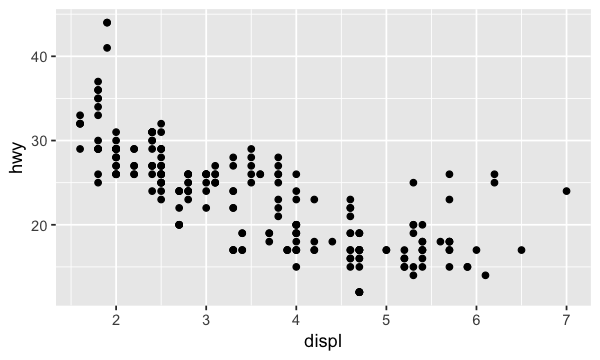

In [5]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy))

On peut mettre plusieurs `geom` dans un seul graphique. Ici, on ajoute une courbe de tendance aux points de notre graphique de base.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


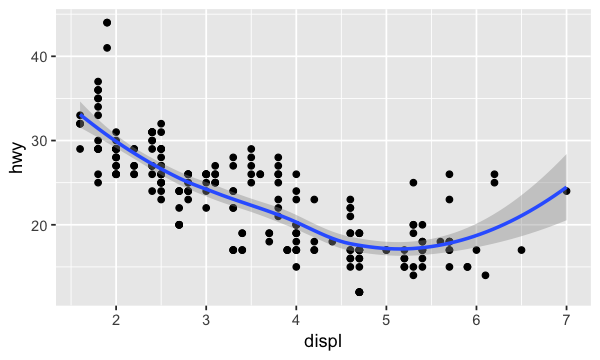

In [6]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy)) +
geom_smooth(mapping = aes(x = displ, y = hwy))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


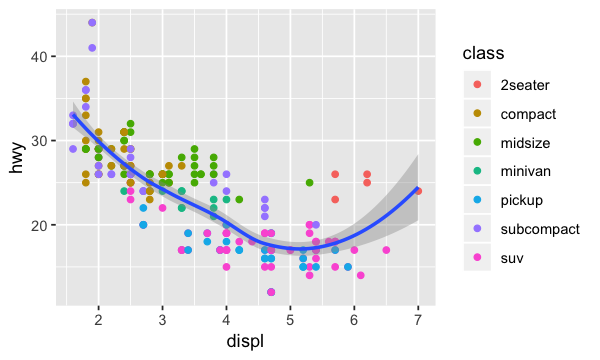

In [7]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
geom_point(mapping = aes(color = class)) +
geom_smooth()

## aes

Dans le graphique précédent, vous avez surement remarqué que certains points sont de mêmes couleurs. En effet, la fonction **`aes`** permet de modifier l'esthétique (_aesthetic_) du graphique. On peut alors ajouter une troisième variable comme la classe, à un nuage de points bidimensionnel. L'esthétique comprend d'autres éléments comme la taille, la forme ou la couleur de vos points.

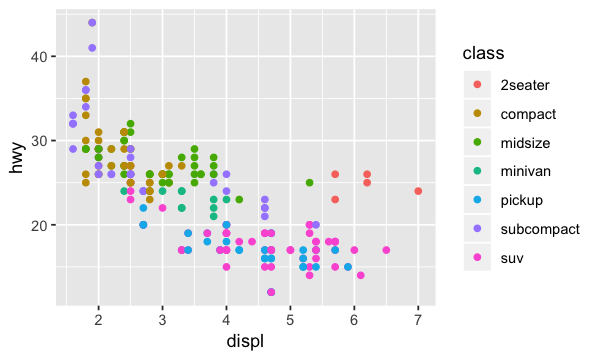

In [8]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, color = class))

Si l’on utilise l'argument `alpha`, on obtient alors;

Warning message:
“Using alpha for a discrete variable is not advised.”

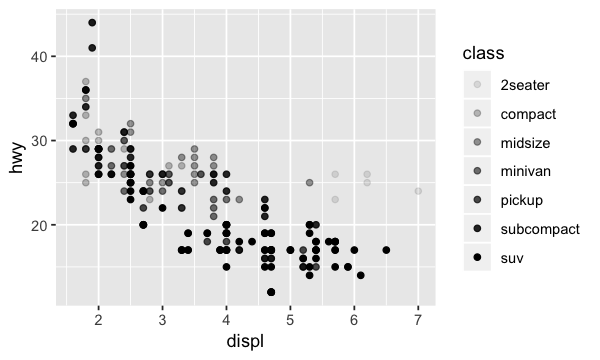

In [10]:
ggplot(data = mpg) + geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

ou la variable `shape`

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

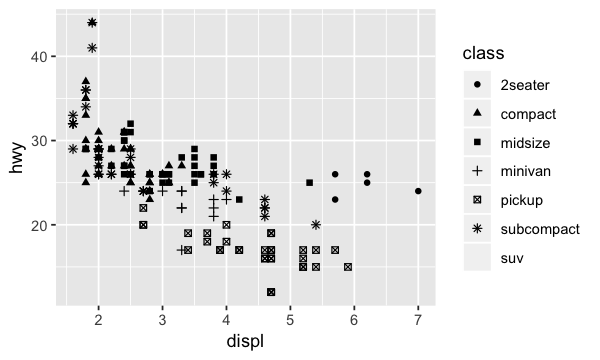

In [11]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy, shape = class))

on obtient un message d'avertissement nous indiquant que l'argument `shape` contient seulement 6 catégories et que dans nos donnés nous en avons 7:



Une autre méthode, particulièrement utile pour les variables catégorielles, consiste à diviser le graphique en facettes, sous-placettes qui affichent chacune une catégorie (ou groupe) des données.


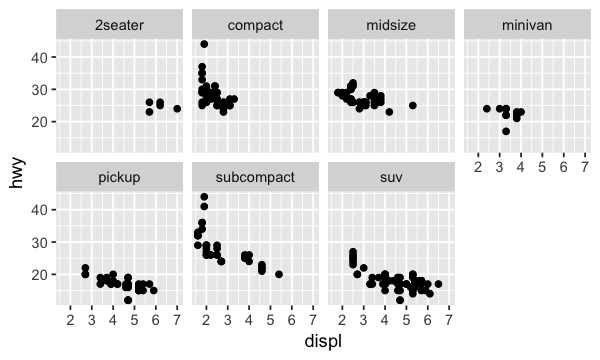

In [12]:
ggplot(data = mpg) +
geom_point(mapping = aes(x = displ, y = hwy)) +
facet_wrap(~ class, nrow = 2)

# Quelques exemples

Bien évidemment, on ne peut pas couvrir tous cas possibles de graphiques. On ne peut les maîtriser que par la pratique sans avoir à connaître par coeur la syntaxe. Vous pouvez toujours consulter [cet aide-mémoire](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) qui résume bien comment tracer des graphiques avec la librairie `ggplot2`



## geom_bar

Il est toujours plus rapide d'avoir une idée de la forme des données catégorielle lorsqu'on les représente dans un graphique de type `bar plot`

Soit les données suivantes qui montrent les moyennes des résultats d'examen du cours ACT3035 du groupe d'hiver 2018 vs automne 2017.


In [26]:
c(rep(1,3), rep(2,3), rep(3,3))

[1] 1 1 1 2 2 2 3 3 3

In [27]:
dat4 <- data.frame(
    session = factor(c("Aut17","Aut17","Aut17","Hiv18","Hiv18","Hiv18", "ETE18", "ETE18", "ETE18")),
    examen = c("Examen_1","Examen_2", "Examen_3","Examen_1","Examen_2", "Examen_3", "Examen_1","Examen_2", "Examen_3"),
    moyenne = c(20, 24, 26, 21, 22, 23,18, 20, 19), 
    ordre=c(c(rep(1,3), rep(2,3), rep(3,3)))
)

In [31]:
dat4

session,examen,moyenne,ordre
Aut17,Examen_1,20,1
Aut17,Examen_2,24,1
Aut17,Examen_3,26,1
Hiv18,Examen_1,21,2
Hiv18,Examen_2,22,2
Hiv18,Examen_3,23,2
ETE18,Examen_1,18,3
ETE18,Examen_2,20,3
ETE18,Examen_3,19,3


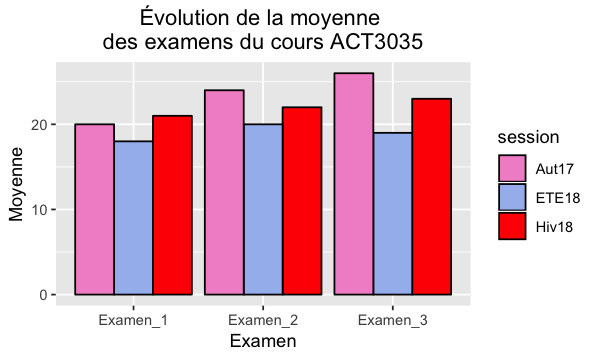

In [30]:
ggplot(data=dat4, aes(x=reorder(examen, -ordre), y=moyenne, fill=session)) +
    geom_bar(stat="identity", position=position_dodge(), colour="black")+
    scale_fill_manual(values=c("#f293ce", "#a5bcef", "red")) +
    xlab("Examen") + ylab("Moyenne") +
    ggtitle("Évolution de la moyenne \ndes examens du cours ACT3035") +
    theme(plot.title = element_text(hjust = 0.5))

**Rmarque:** . 
Par défaut, le `geom_bar` utilise le nombre d'occurrences d'une variable (_count_) comme valeur de la haute de la barre. Si l'on veut que la hauteur corresponde à une valeur d'une variable dans le _data frame_, on doit alors préciser cela avec l'option `stat="identity"` car cette dernière est `stat="bin"` par défaut.


## geom_line

On peut aussi représenter ces données sur des lignes continues en ajoutant deux petites lignes représentant la moyenne ± l'écart-type

Pour ce faire, ajoutons à notre df les données de l'écart-type

In [32]:
dat4$se<-c(.33, .27, .5, .25, .7, .5, .7, .4, .7)

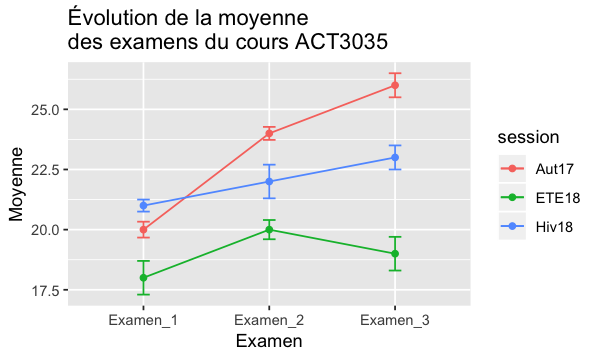

In [33]:
ggplot(dat4, aes(x=examen, y=moyenne, colour=session, group=session,)) + 
    geom_errorbar(aes(ymin=moyenne-se, ymax=moyenne+se), width=.1) +
    geom_line() +
    geom_point()+xlab("Examen") + ylab("Moyenne") +
    ggtitle("Évolution de la moyenne \ndes examens du cours ACT3035")

Nous pouvons faire la même chose avec les `geom_bar` que nous avons vu;

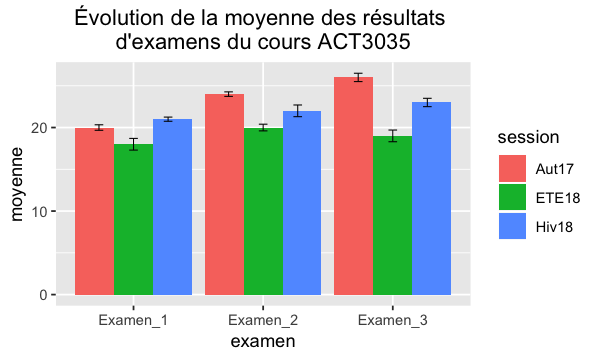

In [34]:
ggplot(dat4, aes(x=examen, y=moyenne, fill=session)) + 
    geom_bar(position=position_dodge(), stat="identity") +
    geom_errorbar(aes(ymin=moyenne-se, ymax=moyenne+se),
                  width=.2,                    # Width of the error bars
                  position=position_dodge(.8),
                size=.3    # Thinner lines
                 )+
    ggtitle("Évolution de la moyenne des résultats \nd'examens du cours ACT3035") +
    theme(plot.title = element_text(hjust = 0.5))

## geom_histogram

La grande différence entre un histogramme et un graphique de type `bar plot` se situe principalement dans le type de données. Dans le premier cas, les données sont groupées par des données catégorielles. Alors que dans le deuxième cas, les données sont présentées en groupe de données continues (quantitative).


![The Difference Between Bar Charts and Histograms](https://www.edrawsoft.com/howto/charts-comparison.png)

Nous avons besoin alors des données continues afin d'illustrer quelques exemples d'histogrammes. Générons-en quelques données continues;

In [35]:
set.seed(1234)
dat <- data.frame(cond = factor(rep(c("A","B"), each=200)), 
                   rating = c(rnorm(200),rnorm(200, mean=.8)))

Nous avons généré 200 observations **(A)** tirées d'une distribution normale centrée réduite, et 200 observations **(B)** tirées d'une distribution normale de moyenne mu=.8

In [17]:
table(dat$cond)


  A   B 
200 200 

In [38]:
# head(dat[sample(nrow(dat)),])

Puisque nous avons là des données continues, représentons-les alors dans un graphique de type `geom_histogram`;

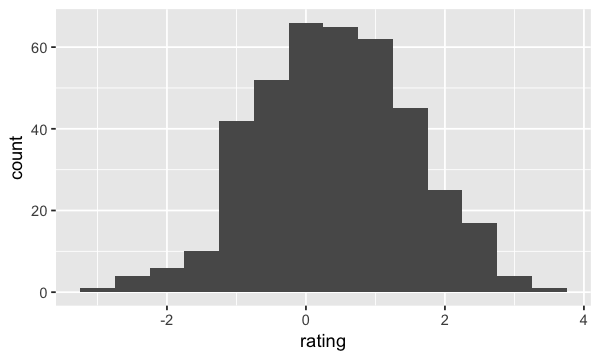

In [39]:
ggplot(dat, aes(x=rating)) + geom_histogram(binwidth=.5)

On voit bien qu'on ne peut pas distinguer les observations `A` de `B`. Pour ce faire, nous devons alors ajouter la condition à `fill=cond` à notre `aes`

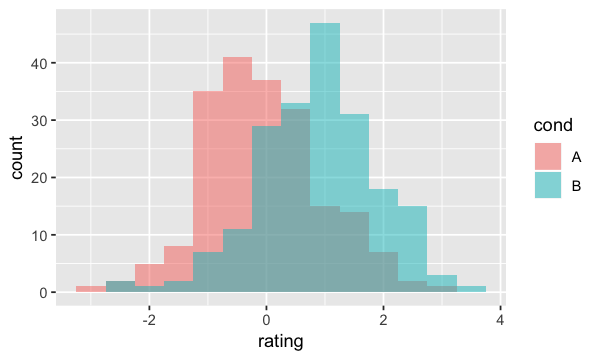

In [40]:
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity")

On peut même ajouter la moyenne de chaque variable;

In [41]:
library(plyr)
cdat <- ddply(dat, "cond", summarise, rating.mean=mean(rating))
cdat

cond,rating.mean
A,-0.05775928
B,0.87324927


Ou calculer directement la moyenne de chaque groupe comme suit;

In [22]:
moyenne_B<-mean(dat$rating[dat$cond == "B"])
moyenne_B

[1] 0.8732493

Utilisons les données `cdat

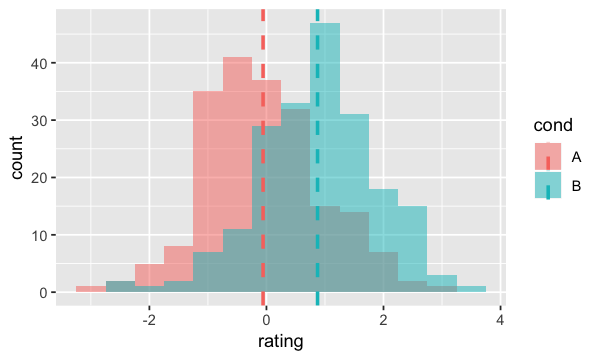

In [42]:
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(binwidth=.5, alpha=.5, position="identity") +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

## geom_density

On peut présenter ces mêmes données sous deux courbes puisqu’elles sont continues;

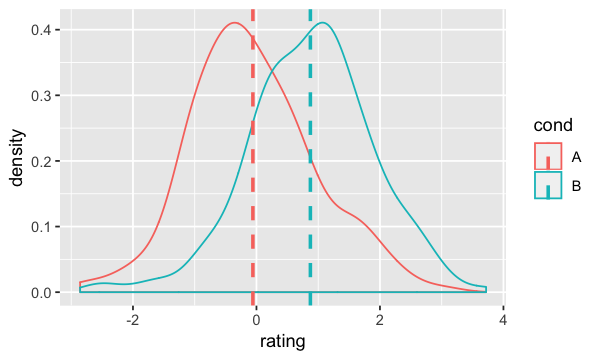

In [43]:
ggplot(dat, aes(x=rating, colour=cond)) +
    geom_density() +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)

Sans oublier qu'il est aussi possible d'ajouter des courbes aux histogrammes;

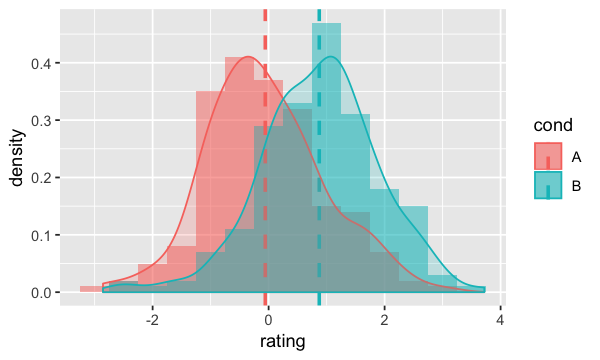

In [44]:
ggplot(dat, aes(x=rating, fill=cond)) +
    geom_histogram(aes(y=..density..),binwidth=.5, alpha=.5, position="identity") +
    geom_vline(data=cdat, aes(xintercept=rating.mean,  colour=cond),
               linetype="dashed", size=1)+geom_density(alpha=.2, aes( colour=cond))

## geom_boxplot

Lorsqu'il s'agit de présenter les données statistiques de base sur des catégories de variables, un graphique de type `geom_boxplot` devient alors incontournable;

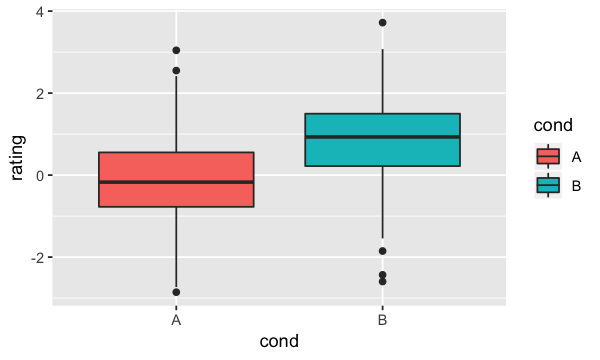

In [45]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot()

Voici comment renverser les axes;

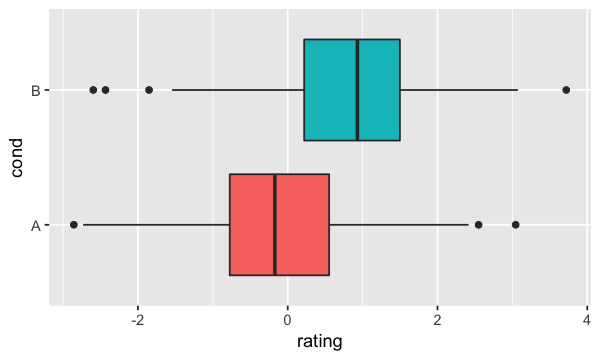

In [46]:
ggplot(dat, aes(x=cond, y=rating, fill=cond)) + geom_boxplot() + 
    guides(fill=FALSE) + coord_flip()

## ggcorrplot

Lorsque nous avons des données où nous trouvons la corrélation entre chaque variable (deux à deux), il peut être difficile de voir où sont les variables les plus (ou les moins) corrélées;

In [47]:
df_app<-read.csv("https://raw.githubusercontent.com/nmeraihi/data/master/stocks_correlation.csv",
                 header = T)[ ,2:9]
head(df_app)

DO,AMZN,AAPL,BA,FB,HON,ITW,NFLX
18.06,750.57,108.6043,146.1413,118.42,111.5562,122.7038,117.00
17.70,768.66,114.3968,152.2714,115.05,114.0969,124.5074,123.80
16.38,823.48,119.8588,159.8419,130.32,116.5296,125.3345,140.71
16.84,845.04,135.3066,176.2839,135.54,122.6161,130.0739,142.13
16.71,886.54,142.5098,174.4757,142.05,123.6397,130.5272,147.81
14.42,924.99,142.4999,182.3383,150.25,129.8480,136.7335,152.20


Dans ces données, nous trouvons le prix de l'action des entreprises citées dans le tableau au 2017-01-01. On peut alors calculer la corrélation entre les variables avec la fonction `corr`

In [48]:
mat_corr<-cor(df_app)
mat_corr

,DO,AMZN,AAPL,BA,FB,HON,ITW,NFLX
DO,1.0000000,-0.5991331,-0.5734723,-0.4594365,-0.5740901,-0.5931147,-0.4391862,-0.4808701
AMZN,-0.5991331,1.0000000,0.9491803,0.8523493,0.9373536,0.9481765,0.9413468,0.9313529
AAPL,-0.5734723,0.9491803,1.0000000,0.8722640,0.9504718,0.9553516,0.8783502,0.9275452
BA,-0.4594365,0.8523493,0.8722640,1.0000000,0.9606722,0.9450005,0.8729395,0.9550461
FB,-0.5740901,0.9373536,0.9504718,0.9606722,1.0000000,0.9786910,0.8972479,0.9762811
HON,-0.5931147,0.9481765,0.9553516,0.9450005,0.9786910,1.0000000,0.9464567,0.9539829
ITW,-0.4391862,0.9413468,0.8783502,0.8729395,0.8972479,0.9464567,1.0000000,0.8993815
NFLX,-0.4808701,0.9313529,0.9275452,0.9550461,0.9762811,0.9539829,0.8993815,1.0000000


Utilisons la librairie `ggcorrplot` qui nous offre beaucoup d'options pour visualiser un tel type de graphique

In [49]:
library(ggcorrplot)

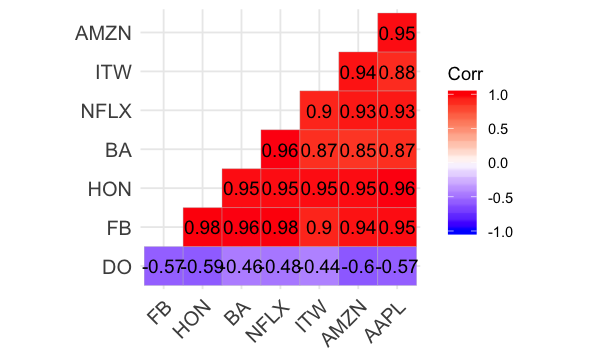

In [50]:
ggcorrplot(mat_corr, hc.order = TRUE, type = "lower",
   lab = TRUE)

Modifions un peu ce graphique;

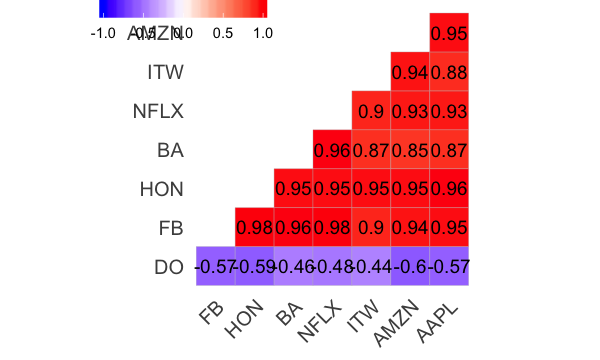

In [51]:
ggcorrplot(mat_corr, hc.order = TRUE, type = "lower",
   lab = TRUE)+theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.grid.major = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  axis.ticks = element_blank(),
  legend.justification = c(1, 0),
  legend.position = c(0.3, 0.85),
  legend.direction = "horizontal")+
  guides(fill = guide_colorbar(barwidth = 7, barheight = 1,
                title.position = "top", title.hjust = 0.5, title="Corrélation Pearson"))

# Conclusion

Bien sûr, il ne faut pas s'attendre à ce que l’on connaisse par coeur toutes les options de graphique. Car de toute façon, il existe beaucoup d'exemples dans la documentation de [ggplot2](http://ggplot2.tidyverse.org/reference/#section-plot-basics).